<a href="https://colab.research.google.com/github/ShitalPatil12/Uber-Data-Analysis-Project/blob/main/Data_Analysis_Project_on_Uber_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**The objective of this project is to analyze Uber trip data to understand patterns, trends, and user behaviors, ultimately deriving actionable insights to improve service efficiency, customer satisfaction, and operational effectiveness.**


---







In [1]:
#Importing neede libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Dataset
uber_df = pd.read_csv('UberData.csv')

# **Data Understanding**

In [3]:
#Lets Look Into Dataset initially we overlook data manually to find loopholes and then using pandas library.
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**Let's explain each column in detail :**

1. **START_DATE:**
   - This column represents the date and time when the trip started.
2. **END_DATE:**
   - This column represents the date and time when the trip ended
3. **CATEGORY:**
   - This column indicates the category of the trip, which could be 'Business' or 'Personal'.
4. **START:**
   - This column represents the starting point or location of the trip.
5. **STOP:**
   - This column represents the ending point or destination of the trip.
6. **MILES:**
   - This column indicates the distance traveled during the trip, typically measured in miles or kilometers.
7. **PURPOSE:**
   - This column provides information about the purpose or reason for the trip. It could include various categories such as 'Meal/Entertainment', 'Meeting', 'Commute', 'Airport', etc.

Each column provides important details about the Uber trip, including its timing, category, locations, distance traveled, and purpose, which can be analyzed to gain insights into user behavior, trip patterns, and service usage.

In [4]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# **Data Cleaning**

In [5]:
#Check for duplicates if yes then remove
uber_df.duplicated().sum()

1

In [6]:
uber_df.drop_duplicates(inplace=True)

In [7]:
uber_df.duplicated().sum()

0

In [8]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
# Filling NULL values in feature PURPOSE
uber_df['PURPOSE'] = uber_df['PURPOSE'].fillna("UNKNOWN")

In [10]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
#Checking For Null values
uber_df.isnull().sum()

START_DATE    0
END_DATE      1
CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
dtype: int64

In [12]:
# We are left with 1 NULL value in features - END_DATE, CATEGORY, START, and STOP.
#Sometimes We can handle the NULL values by dropping that record.
uber_df.dropna(inplace = True)

In [13]:
uber_df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

# **Data Preprocessing**

In [14]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1154 non-null   object 
 1   END_DATE    1154 non-null   object 
 2   CATEGORY    1154 non-null   object 
 3   START       1154 non-null   object 
 4   STOP        1154 non-null   object 
 5   MILES       1154 non-null   float64
 6   PURPOSE     1154 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


In [15]:
#converting START_DATE and END_DATE into datetime format
uber_df['START_DATE'] = pd.to_datetime(uber_df['START_DATE'])
uber_df['END_DATE'] = pd.to_datetime(uber_df['END_DATE'])

In [16]:
#Checking the chnages
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   END_DATE    1154 non-null   datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1154 non-null   float64       
 6   PURPOSE     1154 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.1+ KB


# **Creating New Features**

In [17]:
#create new feature representing time of the ride - morning, afternoon, evening, night
uber_df['TIME_DAY'] = uber_df['START_DATE'].apply(lambda i : i.hour)
uber_df['TIME_OF_DAY'] = uber_df['START_DATE'].apply(lambda i : i.hour)
uber_df['TIME_OF_DAY'] = pd.cut(x = uber_df['TIME_OF_DAY'], bins = [0, 6, 11, 17, 21, 24],\
                                labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)

In [18]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon


In [19]:
#create new feature representing month of the ride
uber_df['MONTH_OF_THE_RIDE'] = uber_df['START_DATE'].apply(lambda i : i.month)
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
uber_df['MONTH_OF_THE_RIDE'] = uber_df['MONTH_OF_THE_RIDE'].map(month_label)

In [20]:
uber_df.sample(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE
575,2016-07-20 17:50:00,2016-07-20 17:57:00,Personal,Edgehill Farms,Preston,1.4,UNKNOWN,17,Afternoon,July
65,2016-02-02 13:51:00,2016-02-02 14:06:00,Business,Cary,Cary,6.0,Errand/Supplies,13,Afternoon,Feb
323,2016-04-22 08:25:00,2016-04-22 09:04:00,Business,Cary,Raleigh,13.6,Meeting,8,Morning,April
232,2016-03-17 12:52:00,2016-03-17 15:11:00,Business,Austin,Katy,136.0,Customer Visit,12,Afternoon,Mar
681,2016-08-19 15:51:00,2016-08-19 16:06:00,Business,Islamabad,Islamabad,3.2,UNKNOWN,15,Afternoon,Aug


In [21]:
#create new feature representing day (week) of the ride
uber_df['DAY_OF_THE_RIDE'] = uber_df['START_DATE'].apply(lambda i : i.weekday())
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
uber_df['DAY_OF_THE_RIDE'] = uber_df['DAY_OF_THE_RIDE'].map(day_label)

In [22]:
uber_df.sample(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE
218,2016-03-13 09:07:00,2016-03-13 09:37:00,Business,The Drag,Convention Center District,5.7,Meal/Entertain,9,Morning,Mar,Sun
397,2016-06-03 18:14:00,2016-06-03 18:29:00,Business,Townes at Everett Crossing,Chessington,3.3,Errand/Supplies,18,Evening,June,Fri
972,2016-11-18 21:56:00,2016-11-18 22:21:00,Business,Krendle Woods,Whitebridge,6.1,Meeting,21,Evening,Nov,Fri
946,2016-11-12 14:22:00,2016-11-12 14:53:00,Business,West Berkeley,South,5.9,Meeting,14,Afternoon,Nov,Sat
72,2016-02-04 18:04:00,2016-02-04 18:31:00,Business,Whitebridge,Macgregor Downs,9.0,Meeting,18,Evening,Feb,Thus


In [23]:
# duration of the ride
uber_df['DURATION_OF_THE_RIDE'] = (uber_df['END_DATE'] - uber_df['START_DATE']).astype('timedelta64[m]')

In [24]:
uber_df.sample(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
992,2016-11-22 21:02:00,2016-11-22 21:14:00,Business,Morrisville,Cary,3.5,Customer Visit,21,Evening,Nov,Tues,12.0
489,2016-06-28 00:48:00,2016-06-28 01:05:00,Business,Morrisville,Cary,8.2,Customer Visit,0,NaN,June,Tues,17.0
311,2016-04-12 10:58:00,2016-04-12 11:18:00,Business,Meredith,Cedar Hill,7.5,Customer Visit,10,Morning,April,Tues,20.0
493,2016-06-29 08:56:00,2016-06-29 09:24:00,Business,Cary,Morrisville,7.3,UNKNOWN,8,Morning,June,Wed,28.0
114,2016-02-16 16:34:00,2016-02-16 17:10:00,Business,Colombo,Colombo,6.0,UNKNOWN,16,Afternoon,Feb,Tues,36.0


# **Data Exploration**

In [25]:
# summary statistics of the dataset
uber_df.describe()

,MILES,TIME_DAY,DURATION_OF_THE_RIDE
count,1154.000000,1154.000000,1154.000000
mean,10.567418,14.688908,23.241768
std,21.588452,4.570667,27.330072
min,0.500000,0.000000,0.000000
25%,2.900000,12.000000,10.000000
50%,6.000000,15.000000,16.000000
75%,10.400000,18.000000,27.750000
max,310.300000,23.000000,336.000000


*  This Provides summary statistics such as mean, standard deviation, minimum, maximum, and quartiles for numerical columns in the dataset. This helps in understanding the distribution of data and identifying any potential outliers or anomalies.

**Statistically Data Distribution:**


*  **MILES:**
    *  Count: 1154 observations.
    *  Mean: 10.57 miles.
    *  Standard deviation: 21.59 miles.
    *  Minimum: 0.5 miles.
    *  Maximum: 310.3 miles.
    *  25th percentile (Q1): 2.9 miles.
    *  Median (50th percentile or Q2): 6 miles.
    *  75th percentile (Q3): 10.4 miles.
*  **TIME_DAY:**
    *  Count: 1154 observations.
    *  Mean: 14.69 (represents the hour of the day).
    *  Standard deviation: 4.57 hours.
    *  Minimum:  0 (midnight).
    *  Maximum: 23 (11:00 PM).
    *  25th percentile (Q1): 12 (noon).
    *  Median (50th percentile or Q2):15 (3:00 PM).
    *  75th percentile (Q3): 18 (6:00 PM).
*  **DURATION_OF_THE_RIDE:**
    *  Count: 1154 observations.
    *  Mean: 23.24 minutes.
    *  Standard deviation:27.33 minutes.
    *  Minimum:  0 minutes.
    *  Maximum: 336 minutes.
    *  25th percentile (Q1): 10 minutes.
    *  Median (50th percentile or Q2): 16 minutes.
    *  75th percentile (Q3): 27.75 minutes.





# **Data Visualization**

In [26]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan,Sat,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Sat,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tues,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wed,67.0


In [27]:
# Convert 'CATEGORY' column to categorical data type
uber_df['CATEGORY'] = uber_df['CATEGORY'].astype('category')

Text(0.5, 1.0, 'Distribution of Categories in CATEGORY')

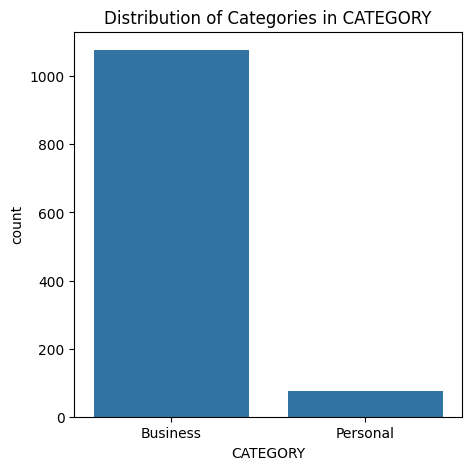

In [28]:
# Creating figure and axes
fig, axes = plt.subplots(figsize=(5, 5))

# Distribution of Categories in CATEGORY
sns.countplot(data=uber_df, x='CATEGORY', ax=axes)
axes.set_title('Distribution of Categories in CATEGORY')

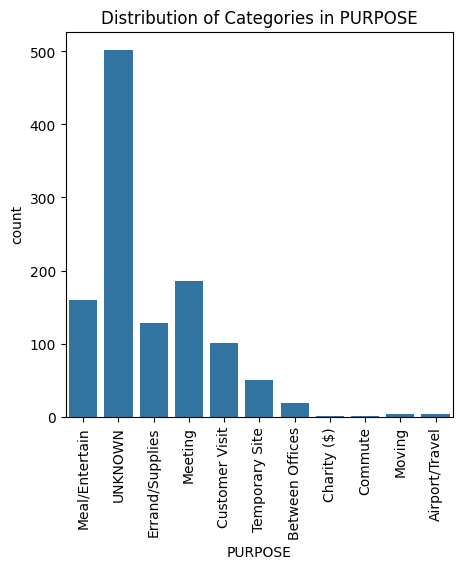

In [29]:
# Creating figure and axes
fig, axes = plt.subplots(figsize=(5, 5))

# Distribution of Categories in PURPOSE
sns.countplot(data=uber_df, x='PURPOSE')
axes.set_title('Distribution of Categories in PURPOSE')
axes.tick_params(axis='x', rotation=90)

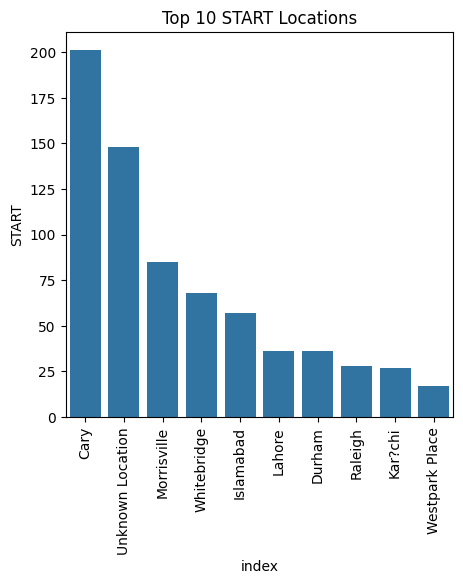

In [30]:
# Creating figure and axes
fig, axes = plt.subplots(figsize=(5, 5))

# Top 10 locations for START
temp = uber_df['START'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp, x='index', y='START', ax=axes)
axes.set_title('Top 10 START Locations')
axes.tick_params(axis='x', rotation=90)

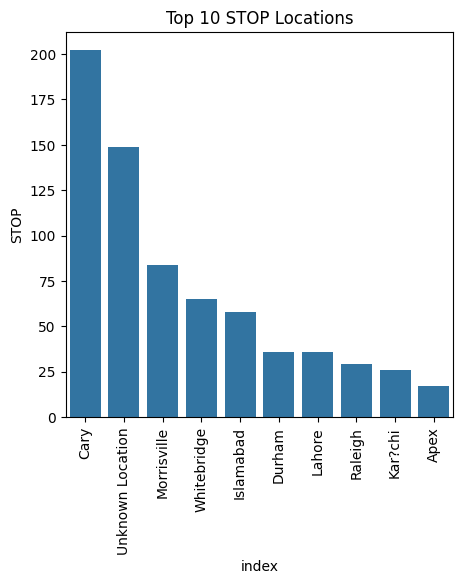

In [31]:
# Creating figure and axes
fig, axes = plt.subplots(figsize=(5, 5))

# Top 10 locations for STOP
temp = uber_df['STOP'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp, x='index', y='STOP', ax=axes)
axes.set_title('Top 10 STOP Locations')
axes.tick_params(axis='x', rotation=90)

In [32]:
# Convert 'TIME_OF_DAY' column to categorical data type
uber_df['TIME_OF_DAY'] = uber_df['TIME_OF_DAY'].astype('category')

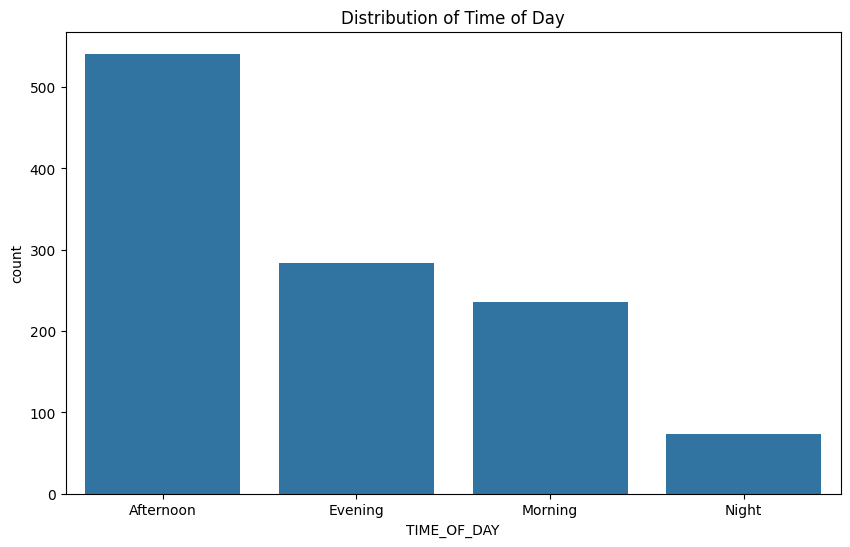

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=uber_df, x='TIME_OF_DAY')
plt.title('Distribution of Time of Day')
plt.show()

In [34]:
# Convert 'MONTH_OF_THE_RIDE' column to categorical data type
uber_df['MONTH_OF_THE_RIDE'] = uber_df['MONTH_OF_THE_RIDE'].astype('category')

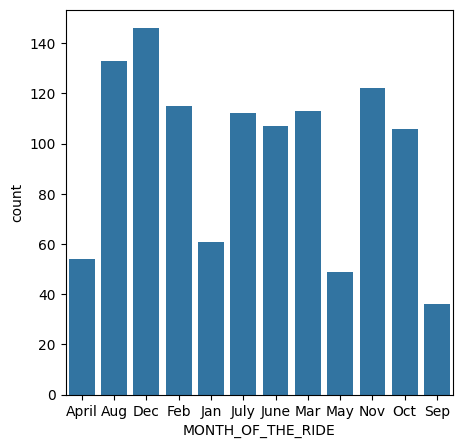

In [35]:
#Visualizing MONTH_OF_THE_RIDE Column
plt.figure(figsize=(5, 5))
sns.countplot(data=uber_df, x='MONTH_OF_THE_RIDE')
plt.show()

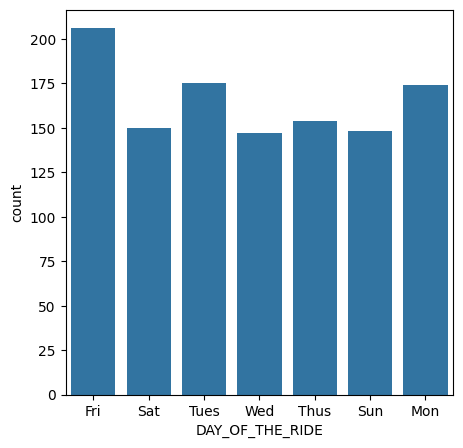

In [36]:
#Visualizing DAY_OF_THE_RIDE Column
plt.figure(figsize=(5, 5))
sns.countplot(data=uber_df, x='DAY_OF_THE_RIDE')
plt.show()

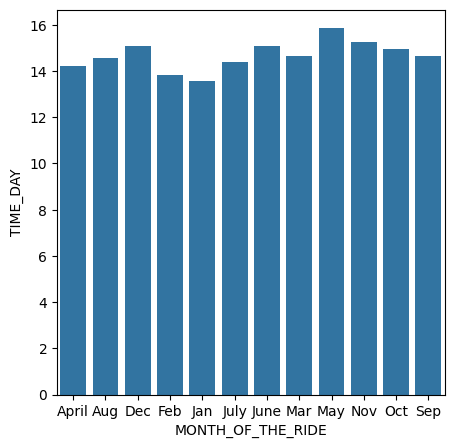

In [37]:
#Visualizing Mean of MONTH_OF_THE_RIDE and TIME_DAY  Column
plt.figure(figsize=(5, 5))
temp = uber_df.groupby('MONTH_OF_THE_RIDE')['TIME_DAY'].mean().reset_index()
sns.barplot(x='MONTH_OF_THE_RIDE', y='TIME_DAY', data=temp)
plt.show()

In [39]:
#uber_df.to_csv('Uber_data_Analysis')